# Polarization reconstruction with PyREx

### Nov 18, 2020

In [22]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")

In [23]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


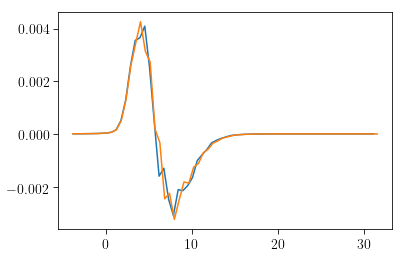

In [24]:
wform = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/EFields_AraSim.pkl")
plt.plot(wform["timeV"],wform.EFieldV)
plt.plot(wform["timeH"],wform.EFieldH)

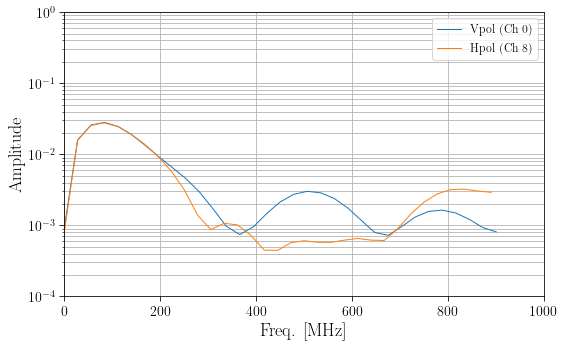

In [25]:
plt.figure(figsize=(8,5))

fft_V, freq_V, dT_V = util.doFFT(wform["timeV"],wform.EFieldV)
fft_H, freq_H, dT_H = util.doFFT(wform["timeH"],wform.EFieldH)
plt.plot(freq_V,abs(fft_V),linewidth=1, label = "Vpol (Ch 0)")
plt.plot(freq_H,abs(fft_H),linewidth=1, label = "Hpol (Ch 8)")
plt.legend()
plt.xlabel("Freq. [MHz]")
plt.ylabel("Amplitude")
# plt.title('Spectra (E-fields, Ch. 0 and Ch. 8), %s'%solNum[ray])
plt.yscale("log")
plt.ylim(1E-4,1)
plt.xlim(0,1000)
plt.grid(which="both")
plt.tight_layout()

Significant signal amplitude was lost when forcing the signal values to be real after applying the frequency filter 'interpolate_filter'. This may be avoided by making sure the filter being used is properly defined for negative frequencies.


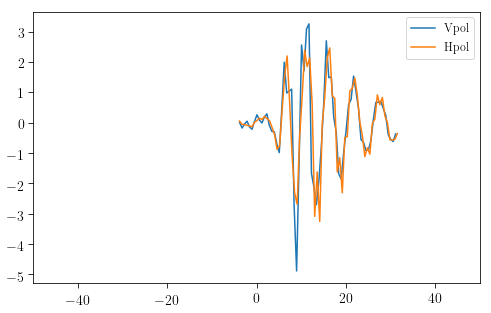

In [26]:
# wform["timeV"],wform.EFieldV

sig = pyrex.Signal(wform["timeV"]*1E-9,wform.EFieldV*1E-3,'voltage') # times in seconds
antV = util.ara.VpolAntenna(name="Dummy Vpol", position=(0, 0, 0), power_threshold=0)
antV.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))
# sig = antV.apply_response(sig, direction=dirProp, polarization=pol_ev, force_real=True)
output = antV.front_end(sig)

timeV = output.times*1E9 #in ns
voltageV = output.values*1E3 #in mV


sigH = pyrex.Signal(wform["timeH"]*1E-9,wform.EFieldH*1E-3,'voltage') # times in seconds

antH = util.ara.HpolAntenna(name="Dummy Hpol", position=(0, 0, 0), power_threshold=0)
antH.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))
# sigH = antH.apply_response(sigH, direction=dirProp, polarization=pol_ev, force_real=True)
outputH = antH.front_end(sigH)
timeH = outputH.times*1E9 #in ns
voltageH = outputH.values*1E3 #in mV

trace = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/Traces.pkl")
plt.figure(figsize=(8,5))

plt.plot(timeV,voltageV, label="Vpol")
plt.plot(timeH,voltageH, label="Hpol")
# plt.plot(trace.time, trace.traceV, label = "Vpol AraSim")
# plt.plot(trace.time, trace.traceH, label = "Hpol AraSim")
plt.xlim(-50,50)
plt.legend()

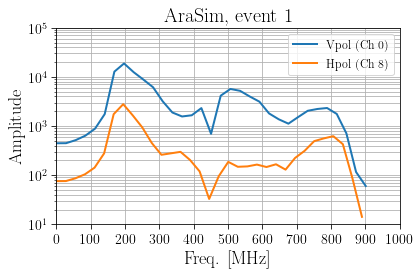

In [35]:
# plt.figure(figsize=(8,5))

fft_V, freq_V, dT_V = util.doFFT(timeV,1E3*voltageV*0.989/2)
fft_H, freq_H, dT_H = util.doFFT(timeH,1E3*voltageH*0.147/2)
plt.plot(freq_V,abs(fft_V),linewidth=2, label = "Vpol (Ch 0)")
plt.plot(freq_H,abs(fft_H),linewidth=2, label = "Hpol (Ch 8)")
plt.legend()
plt.xlabel("Freq. [MHz]")
plt.ylabel("Amplitude")
# plt.title('Spectra (E-fields, Ch. 0 and Ch. 8), %s'%solNum[ray])
plt.grid(which="both")
plt.xticks(np.arange(0, 1001, step=100))
plt.yscale("log")
plt.xlim(0,1000)
plt.ylim(1E1,1E5)

plt.legend()
plt.title("AraSim, event 1")
plt.tight_layout()

In [33]:
2.5E-2/0.123

0.20325203252032523